# Courier - single-unit preprocessing

Raw data files are stored in an .ng5/ns6 ending. 
These files are the output of the blackrock system. 
(To read about the meaning of the different file endings, see: https://blackrockneurotech.com/research/wp-content/ifu/LB-0826-1.11-Python-Offline-Utilities-IFU-Draft.pdf)

The raw data files are stored in a non-consistent manner on Rhino. 
To find them, you can run the following code in terminal:

find -P /data10/RAM/subjects/ -type f -name “*.ns[2-6]

and for Frieburg subjects:

find -P /data/eeg/FR* -type f -name "*.ns[2-6]"



Let's start by finding event files for courier subjects:

In [29]:
from scipy.io import loadmat
import pandas as pd


In [30]:
%cd '/home1/noaherz/micros'
from define_data import *


/home1/noaherz/micros


'define_data' is a function that returns a list of courier subjects and sessions (event files). 
parameters are: define_data(micros,dBoy25,DBoy3_1,include_learning, DBoy4) where each of the input arguments is 
True or False depending on whether you want to get only subjects with micros 
and whether you want to include data from the different versions or the learning session.


Notice that this function reads .mat files, as older subjects had their events stored in matlab files. 
Newer subjects will have their events stored in a different way, so this function will read only a small amount of the existing data.

In [31]:

subjectList,sessionList=define_data(True,True,True,True,True) 
print('subjects number:',len(subjectList))
print('session number:',len(sessionList))
subjectList
sessionList


noMicros
['FR425', 'FR452', 'FR454', 'FR455', 'FR456', 'FR462', 'R1065J', 'R1066P', 'R1075J', 'R1092J', 'R1383J', 'R1384J', 'R1389J', 'R1398J', 'R1401J', 'R1436J', 'R1475J', 'TJ022', 'TJ025', 'TJ057']
subjects number: 22
session number: 51


['/data/events/courier/DBoy3_1/delivery/processed/FR453_events_sess0.mat',
 '/data/events/courier/DBoy3_1/delivery/processed/FR453_events_sess1.mat',
 '/data/events/courier/DBoy3_1/delivery/processed/FR453_events_sess2.mat',
 '/data/events/courier/DBoy3_1/delivery/processed/R1313J_events_sess0.mat',
 '/data/events/courier/DBoy3_1/delivery/processed/R1313J_events_sess1.mat',
 '/data/events/courier/DBoy3_1/delivery/processed/R1313J_events_sess2.mat',
 '/data/events/courier/DBoy3_1/delivery/processed/R1343J_events_sess0.mat',
 '/data/events/courier/DBoy3_1/delivery/processed/R1343J_events_sess1.mat',
 '/data/events/courier/DBoy3_1/delivery/processed/R1348J_events_sess0.mat',
 '/data/events/courier/DBoy3_1/delivery/processed/R1348J_events_sess1.mat',
 '/data/events/courier/DBoy3_1/delivery/processed/R1348J_events_sess2.mat',
 '/data/events/courier/DBoy3_1/learning/processed/FR453_events_sesslearning.mat',
 '/data/events/courier/DBoy3_1/learning/processed/R1313J_events_sesslearning.mat',
 '

In [32]:
print('number of subjects: ',len(subjectList))


number of subjects:  22


Load one .mat file to inspect the event structure

In [33]:
# read one example of a .mat file 
filename = sessionList[0]
records = pd.DataFrame(loadmat(filename, squeeze_me=True)['events'])
records

,subject,session,trial,type,serialPos,item,store,storeX,storeZ,presX,...,micfile,repeat,singleRecall,surrVocalization,enc_mstime,outputPosition,postPerc,postPerc_time,path_length,excess_path_length
0,FR453,0,0,STORE_FAM,-999,-999,bike_shop,-999.0,-999.0,-999.0,...,/data/eeg/FR453/raw/DBoy3_1_0/micro/20170731-2...,-999,-999,-999,-999.0,-999,-999.0,-999.0,NaN,NaN
1,FR453,0,0,STORE_FAM,-999,-999,clothing_store,-999.0,-999.0,-999.0,...,/data/eeg/FR453/raw/DBoy3_1_0/micro/20170731-2...,-999,-999,-999,-999.0,-999,-999.0,-999.0,NaN,NaN
2,FR453,0,0,STORE_FAM,-999,-999,jewelry_store,-999.0,-999.0,-999.0,...,/data/eeg/FR453/raw/DBoy3_1_0/micro/20170731-2...,-999,-999,-999,-999.0,-999,-999.0,-999.0,NaN,NaN
3,FR453,0,0,STORE_FAM,-999,-999,dentist,-999.0,-999.0,-999.0,...,/data/eeg/FR453/raw/DBoy3_1_0/micro/20170731-2...,-999,-999,-999,-999.0,-999,-999.0,-999.0,NaN,NaN
4,FR453,0,0,STORE_FAM,-999,-999,florist,-999.0,-999.0,-999.0,...,/data/eeg/FR453/raw/DBoy3_1_0/micro/20170731-2...,-999,-999,-999,-999.0,-999,-999.0,-999.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,FR453,0,102,FFR_REC_WORD_VV,-999,-999,-999,-999.0,-999.0,-999.0,...,/data/eeg/FR453/raw/DBoy3_1_0/micro/20170731-2...,-999,-999,-999,-999.0,-999,-999.0,-999.0,NaN,NaN
403,FR453,0,102,FFR_REC_WORD_VV,-999,-999,-999,-999.0,-999.0,-999.0,...,/data/eeg/FR453/raw/DBoy3_1_0/micro/20170731-2...,-999,-999,-999,-999.0,-999,-999.0,-999.0,NaN,NaN
404,FR453,0,102,FFR_REC_WORD_VV,-999,-999,-999,-999.0,-999.0,-999.0,...,/data/eeg/FR453/raw/DBoy3_1_0/micro/20170731-2...,-999,-999,-999,-999.0,-999,-999.0,-999.0,NaN,NaN
405,FR453,0,102,FFR_REC_WORD_VV,-999,-999,-999,-999.0,-999.0,-999.0,...,/data/eeg/FR453/raw/DBoy3_1_0/micro/20170731-2...,-999,-999,-999,-999.0,-999,-999.0,-999.0,NaN,NaN


In [34]:
# or take a look only at recalled events:
records[records['type']=='REC_WORD'][0:4]


,subject,session,trial,type,serialPos,item,store,storeX,storeZ,presX,...,micfile,repeat,singleRecall,surrVocalization,enc_mstime,outputPosition,postPerc,postPerc_time,path_length,excess_path_length
64,FR453,0,1,REC_WORD,5,notenstaender,music_store,-107.5,18.8,-999.0,...,/data/eeg/FR453/raw/DBoy3_1_0/micro/20170731-2...,0,0,0,1501675323886.0,1,90.0,0.0,NaN,NaN
65,FR453,0,1,REC_WORD,12,zahnbuerste,dentist,-70.11,68.83,-999.0,...,/data/eeg/FR453/raw/DBoy3_1_0/micro/20170731-2...,0,0,0,1501675645503.0,2,88.888889,100.0,NaN,NaN
66,FR453,0,1,REC_WORD,11,orange,grocery_store,-102.7,101.3,-999.0,...,/data/eeg/FR453/raw/DBoy3_1_0/micro/20170731-2...,0,0,0,1501675631103.0,3,37.5,0.0,NaN,NaN
67,FR453,0,1,REC_WORD,1,legosteine,toy_store,-140.2,-34.46,-999.0,...,/data/eeg/FR453/raw/DBoy3_1_0/micro/20170731-2...,0,0,1,1501675179038.0,4,14.285714,14.285714,NaN,NaN


# Read micros data

Blackrock created a set of functions aimed at loading and manipulating Blackrock Microsystems datafiles.
These functions, as well as some guidance about how to use them, can be found here:
https://github.com/BlackrockNeurotech/Python-Utilities

In [1]:
# I cloned their Github repository 
%cd /home1/noaherz/micros/Python-Utilities


/home1/noaherz/micros/Python-Utilities


If needed, type 'pip install qtpy' in terminal before importing their functions.

In [2]:
import matplotlib.pyplot as plt
from numpy               import arange
from brpylib             import NsxFile, brpylib_ver


In [3]:
import sys
import os
from os import path
from os import path as ospath

sys.path.append(path.abspath('/home1/nherweg/01_toolbox/brPY'))
sys.path.append(path.abspath('/home1/nherweg/01_toolbox/NeuralynxIO'))
import neuralynx_io
%cd '/home1/noaherz/micros/Python-Utilities'
from brpylib import NsxFile
import numpy as np
# from ptsa.data.readers import EEGReader


/home1/noaherz/micros/Python-Utilities


In [4]:
from os import path as ospath
import json

import h5py
import scipy.io as sio


I copied one subjects' raw data (FR453_raw_DBoy3_1_0) to make sure I am not over-writing any existing files:

In [5]:
path= '/home1/noaherz/micros/FR453_raw_DBoy3_1_0/'
path


'/home1/noaherz/micros/FR453_raw_DBoy3_1_0/'

In [6]:
# and chose one example data
micfile=path +'20170731-20170802-114903-191345.ns5'
micfile


'/home1/noaherz/micros/FR453_raw_DBoy3_1_0/20170731-20170802-114903-191345.ns5'

Let's read the .ns5 raw data. the output will include, among other things, the raw data in the form of channels x samples.
Pay attention to the fact that the whole data should be read (all channels and all time points), 
as this function might have a bug when loading only partial data.

In [7]:
# read the ns5 file
nsxFileObj = NsxFile(micfile)
nsxFileContent = nsxFileObj.getdata('all', 0,1,1) # channels, start time, data time, downsample factor, zeropad
nsxFileObj.close()

# obtain the raw data in the ns5 file, organized as N-by-M array with
# N = number of channels and M = number of samples
microData = nsxFileContent['data'][0].T

# convert into microvolt data by dividing by 4 (ask Lukas about this...)
microDataUV = microData / 4



20170731-20170802-114903-191345.ns5 opened

Output data requested is larger than 1 GB, attempting to preallocate output now

20170731-20170802-114903-191345.ns5 closed


Check that the output has chennels x samples as dimensions

In [8]:
print('number of channels: ',len(nsxFileContent['elec_ids']))
nsxFileContent['data_headers'][0]

number of channels:  35


{'Timestamp': 0, 'NumDataPoints': 206147130}

In [9]:
# should be channels x samples
microDataUV.shape


(35, 206147130)

In [10]:
ospath.splitext(nsxFileObj.datafile.name)[0]



'/home1/noaherz/micros/FR453_raw_DBoy3_1_0/20170731-20170802-114903-191345'

Separate the raw data into different channels

This part of the script was taken from:
    https://github.com/JacobsSU/SpikeSorting/blob/main/notebooks/Intro_SpikeSorting2.ipynb

In [11]:
%pwd

'/home1/noaherz/micros/Python-Utilities'

In [46]:
# Open a text file and write in header information (this is not working fir some reason, but doesn't seem crucial)
path = ospath.splitext(nsxFileObj.datafile.name)[0]
with open('{}_params.txt'.format(path), 'w') as file:
     file.write(json.dump(nsxFileContent,file))

TypeError: Object of type ndarray is not JSON serializable

In [12]:
path = ospath.splitext(nsxFileObj.datafile.name)[0]
path

'/home1/noaherz/micros/FR453_raw_DBoy3_1_0/20170731-20170802-114903-191345'

f.create_dataset is the function that splits the raw data into seperate channels.
We want to save the new channels into a new folder ('split channel') instead of the default that saves them within the same folder of the raw data.

See Tom's code for further details:
https://github.com/JacobsSU/SortT3/blob/main/scripts/split_files.py

    

In [22]:
# For Combinato (separate channels - save as matfiles)
## NOTE: CURRENTLY, Combinato hangs on large datasets. 

# # Open a text file and write in header information 
path = ospath.splitext(nsxFileObj.datafile.name)[0]
file_name = ospath.splitext(nsxFileObj.datafile.name)[0][22:-1]
subject_path='/home1/noaherz/micros/FR453_raw_DBoy3_1_0'
# with open('{}_params.txt'.format(path), 'w') as file:
#      file.write(json.dumps(nsxFileContent)
    
# Split the data by channels and write into hdf5 files
for ix, electrode in enumerate(nsxFileContent['elec_ids']):
    if electrode != '129': # This is typically the sync pulse channel
                
        if not os.path.exists(f"{subject_path}/split_files"):
            print('Creating split_files folder')
            os.mkdir(f"{subject_path}/split_files")

        os.chdir(f"{subject_path}/split_files")   
         ## Save out HDF5 of microdata   : 
        f = h5py.File("{}_chan{}.hdf5".format(path, electrode), "w")
#         f = h5py.File({}_chan_{}.hdf5'.format(path,electrode), "w")
        os.chdir(f"{subject_path}/split_files")
        f.create_dataset('data', data=microData[ix, :], dtype='<i2')
        f.close()
        print('split electrode {}'.format(ix))
        #  Using the blackrock code
        #nsxfile.savesubsetnsx(elec_ids=[electrode], file_suffix='chan_{}'.format(electrodes))
        # Matfile: 
        #data_as_dict = {'data': data[ix, :11000000].astype('double'),
        #                 'sr':30000}
        #sio.savemat("{}_chan{}.mat".format(path, electrode), data_as_dict)


split electrode 0
split electrode 1
split electrode 2
split electrode 3
split electrode 4
split electrode 5
split electrode 6
split electrode 7
split electrode 8
split electrode 9
split electrode 10
split electrode 11
split electrode 12
split electrode 13
split electrode 14
split electrode 15
split electrode 16
split electrode 17
split electrode 18
split electrode 19
split electrode 20
split electrode 21
split electrode 22
split electrode 23
split electrode 24
split electrode 25
split electrode 26
split electrode 27
split electrode 28
split electrode 29
split electrode 30
split electrode 31
split electrode 32
split electrode 33
split electrode 34


Load the hd5 files and take a look at the raw data

In [14]:
%pwd
# %cd ..
# %cd FR453_raw_DBoy3_1_0

'/home1/noaherz/micros/FR453_raw_DBoy3_1_0/split_files'

In [15]:
f = h5py.File("20170731-20170802-114903-191345_chan1.hdf5".format(path), "r")
out=f.get('data') # Plot the data for few channels to check they seem ok
out.shape

(206147130,)

Text(0, 0.5, 'What measuring units?')

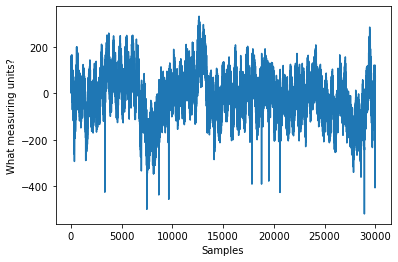

In [20]:
# add a basic plot to see that the data exists.
plt.plot(out[0:30000]) #random subset
plt.xlabel('Samples')
plt.ylabel('What measuring units?')

Within the same folder in which we have the channels data ('split channel'), we will also save the .sh script that can be found here:
    https://github.com/JacobsSU/SortT3/blob/main/shell/run_sorting.sh
    
We can than open the terminal from our Jupyter lab and run this run_sorting.sh script.(chmod +x ./run_sorting.sh if needed)
This script will do the automatic spike sorting for our data, and the output will be different folders for each of our channels 
(with subdirectories that will be automatically created within them).

This step takes time, so you might want to use the 'screen' commend in terminal to make sure that if the connection is disrupted your task will keep on running.

Pay attantion to the fact that before running the run_sorting.sh, you will need to download Combinato to your computer and make sure 
it is added to your home directory. I did it using the following commands on terminal:
    
Activate your environment: 
(Follow this installation setup: https://github.com/JacobsSU/SpikeSorting/blob/main/notebooks/Intro_SpikeSorting2.ipynb)
    
source activate spike_clustering
    
    
and then set up your paths: (change according to the place where your combinato repo is stored:)


    

In [23]:
# PATH=$PATH:/home1/noaherz/micros/combinato
# PYTHONPATH=$PYTHONPATH:/home1/noaherz/micros/combinato
# export PATH PYTHONPATH

check the Combinato code & docs:
https://github.com/jniediek/combinato


In [21]:
# # Write a bash script to run the automatic spike sorting for all the data 
# # Note, because Combinato currently doesn't support parallel processing for non-Neuralynx data, we use css-simple-clustering. 

# '/home1/noaherz/micros/FR453_raw_DBoy3_1_0/20170731-20170802-114903-191345'

# path_to_sh = '/home1/noaherz/micros/FR453_raw_DBoy3_1_0'
# path_to_split_files= '/home1/noaherz/micros/FR453_raw_DBoy3_1_0'
# path_to_save_jobfiles= '/home1/noaherz/micros/FR453_raw_DBoy3_1_0/clustered_spikes'
# user_name = path_to_sh.split('/')[2][0:3]


# # Extract and cluster NEGATIVE polarity spikes 
# with open ('{}/run_combinato_neg.sh'.format(path_to_sh), 'w') as bash_script:
#         bash_script.write('''
#                     #!/bin/bash
#                     declare -a arr=({path_to_split_files})
#                     mkdir {path_to_save_jobfiles}
#                     mkdir {path_to_save_jobfiles}/$(date '+%d-%b-%Y')
#                     cd {path_to_save_jobfiles}/$(date '+%d-%b-%Y')
#                     touch do_manual_neg.txt
#                     for file in "${{arr[@]}}"; do
#                         cd $file
#                         for chan in *.mat; do
#                             css-extract --files ${{chan%%.*}}.hdf5 --h5
#                         css-mask-artifacts
#                         ls */*.h5 > do_sort.txt
#                         css-prepare-sorting --neg --jobs do_sort.txt
#                         css-cluster --jobs do_sort.txt
#                         css-combine --jobs do_sort.txt
#                         done
#                     done
#                 '''.format(path_to_split_files=path_to_split_files,
#                            path_to_save_jobfiles=path_to_save_jobfiles,
#                            user_name=user_name))


In [29]:
# import subprocess
# subprocess.call(['{}/run_combinato.sh'.format(path_to_sh)], shell=True)

OSError: [Errno 12] Cannot allocate memory

head to your terminal.

Make sure you type in

source activate spike_clustering

to ensure you're in the proper environment. Then,

cd /home1/noaherz/micros/FR453_raw_DBoy3_1_0

bash run_combinato_neg.sh

# Notes about data organization:
    
Tom created an organized structure of files that can be found here:    
    https://github.com/JacobsSU/SortT3/blob/main/scripts/settings.py
    
and here:
    https://github.com/JacobsSU/convnwb/blob/main/convnwb/session.py
    
It probably make sense to decide on the exact organization after spike sorting 2-3 subjects, 
so that I'll have a better sense of the files created.

## Ignore the rest

In [17]:
# path=records.iloc[64]['micfile'][0:35]
# import os
# os.chdir(path)
# %ls

20170731-20170802-114903-191345.ns5
20170731-20170802-114903-191345.params.txt
20170731-20170802-114903-191345.sync.txt
20170731-20170802-134338-191345.ns5
20170731-20170802-134338-191345.params.txt
20170731-20170802-134338-191345.sync.txt
20170731-20170802-144405-191345.ns5
20170731-20170802-144405-191345.params.txt
20170731-20170802-144405-191345.sync.txt


In [23]:
# %less 20170731-20170802-114903-191345.params.txt
# %less 20170731-20170802-114903-191345.sync.txt
%less 20170731-20170802-134338-191345.params.txt
# %less 20170731-20170802-144405-191345.params.txt

samplerate 30000.0

In [38]:
start_time['micfile']

'/data/eeg/FR453/raw/DBoy3_1_0/micro/20170731-20170802-114903-191345.ns5'

In [37]:
start_time = records.iloc[64]
channels=[]
samplerate = 30000
starti = np.round(start_time['micoffset']/np.float(samplerate),decimals = 3)

temp_dat1=[]
# nsx_file = NsxFile(start_time['micfile'])
nsx_file = NsxFile('/home1/noaherz/micros/FR453_raw_DBoy3_1_0/20170731-20170802-114903-191345.ns5')
temp_dat1 = nsx_file.getdata('all', starti,1,1)
temp_dat2=nsx_file.getdata(elec_ids=[1],start_time_s=0,data_time_s=2,downsample=1)
# temp_dat = nsx_file.getdata(channels, starti, data_time, 1)['data']
# temp_dat2 = nsx_file.getdata([1,2], starti, 5, 1)['data']
nsx_file.close()



20170731-20170802-114903-191345.ns5 opened

Output data requested is larger than 1 GB, attempting to preallocate output now

Output data requested is larger than 1 GB, attempting to preallocate output now

20170731-20170802-114903-191345.ns5 closed


In [38]:
len(temp_dat2['data'][0])


206147130

In [39]:
# temp_dat1['data'].shape # should be channels x samples
len(temp_dat1['data'][0])

206147130

In [53]:
temp_dat1.keys()

dict_keys(['elec_ids', 'start_time_s', 'data_time_s', 'downsample', 'data', 'data_headers', 'ExtendedHeaderIndices'])

In [55]:
temp_dat1

{'elec_ids': [1],
 'start_time_s': 1125.878,
 'data_time_s': 5,
 'downsample': 1,
 'data': [array([[  74],
         [ 122],
         [ 196],
         ...,
         [6407],
         [5603],
         [  -5]], dtype=int16)],
 'data_headers': [{'Timestamp': 0, 'NumDataPoints': 206147130}],
 'ExtendedHeaderIndices': [0]}

In [37]:
samplerate*5

150000